# 【单元作业】10 回归问题

作业说明：
题目一：

使用“商品房销售记录表”（表1）作为样本数据，训练一元线性回归模型，根据商品房面积预测房价。

提示用户输入商品房面积，并进行输入校验。合理的输入为20~500之间的实数。如果输入正确，根据模型估计房价，并输出显示；如果输入数据类型错误，或者输入数据范围不合理，根据错误类型提示，并等待用户重新输入，输错3次，则程序结束。

要求：

⑴ 编写代码，实现程序功能；
⑵ 记录实验过程和结果：尝试调试超参数，使模型达到最优的性能，记录实验过程和结果

![alt text](https://p.ananas.chaoxing.com/star3/origin/6afcaaf6806dad57779db4340f3d5708.png)

题目二：

使用“商品房销售记录表”（表1）作为样本数据，建立多元回归模型，预测商品房房价，并按下列要求完成程序。

要求：

⑴ 建立多元线性回归模型，根据商品房面积和房间数，预测销售价格。其中矩阵运算部分采用TensorFlow实现，数据加载、输入、输出等可以根据需要采用Python列表/NumPy数组来实现。

⑵ 提示用户输入商品房面积和房间数，并对输入数据进行有效性检验。

合理的输入如下：

面积：20-500之间的实数

房间数：1-10之间的整数

如果输入正确，根据模型估计房价，并显示。

如果输入数据类型错误或者输入数据范围不合理，根据错误类型提示，并等待用户重新输入。

⑶ 创建3D绘图对象来绘制空间点集

x轴表示商品房面积，y轴表示房间数，z轴表示样本的销售价格。

提示：

① TensorFlow中矩阵求逆函数tf.linalg.inv()

② 输入时，请注意商品房面积对应房间数的合理性

③ 绘制空间点集时需要导入以下包:

    from mpl_toolkits.mplot3d import Axes3D

④ 创建3D绘图对象

    fig=plt.figure() 

    ax3d=Axes3D(fig)

# 题目一

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([137.97, 104.50, 100.00, 124.32, 79.20, 99.00, 124.00, 114.00, 
                106.69, 138.05, 53.75, 46.91, 68.00, 63.02, 81.26, 86.21])
y = np.array([145.00, 110.00, 93.00, 116.00, 65.32, 104.00, 118.00, 91.00, 
                62.00, 133.00, 51.00, 45.00, 78.50, 69.65, 75.69, 95.30])

# 设置超参数
learn_rate = 0.00001
iter = (int)(100)  # 迭代次数

display_stap = 10 # 输出中间结果间隔

In [2]:
# 设置参数模型初值
np.random.seed(612)
w = np.random.randn()
b = np.random.randn()

# 训练模型
mse = []
for i in range(0, iter + 1):
    dL_dw = np.mean(x*(w*x+b-y))
    dL_db = np.mean(w*x+b-y)

    w = w - learn_rate * dL_dw
    b = b - learn_rate * dL_db

    pred = w * x + b
    Loss = np.mean(np.square(y-pred)/2)
    mse.append(Loss)

    if i % display_stap == 0:
        print("i: %i, Loss: %f, w: %f, b: %f" %(i, mse[i], w, b))

i: 0, Loss: 3874.243711, w: 0.082565, b: -1.161967
i: 10, Loss: 562.072704, w: 0.648552, b: -1.156446
i: 20, Loss: 148.244254, w: 0.848612, b: -1.154462
i: 30, Loss: 96.539782, w: 0.919327, b: -1.153728
i: 40, Loss: 90.079712, w: 0.944323, b: -1.153435
i: 50, Loss: 89.272557, w: 0.953157, b: -1.153299
i: 60, Loss: 89.171687, w: 0.956280, b: -1.153217
i: 70, Loss: 89.159061, w: 0.957383, b: -1.153156
i: 80, Loss: 89.157460, w: 0.957773, b: -1.153101
i: 90, Loss: 89.157238, w: 0.957910, b: -1.153048
i: 100, Loss: 89.157187, w: 0.957959, b: -1.152997


In [4]:
def is_valid_input(user_input):
    try:
        num = float(user_input)
        if 20 <= num <= 500:
            print(f"您输入的商品房面积是：{num}")
            return True
        else:
            print("对不起，您输入的面积范围不正确，请重新输入！")
            return False
    except ValueError:
        print("对不起，您输入的不是整数，请重新输入！")
        return False

attempts = 0
while attempts < 3:
    house_area = input("请输入商品房面积(20~500):")
    if is_valid_input(house_area):
        print(f"预测的房价：{w*float(house_area) + b:.3f}万元")
        break
    attempts += 1
else:
    print("对不起，您已经3次输入错误，程序退出。")


您输入的商品房面积是：345.0
预测的房价：329.343万元


# 题目二

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

area = np.array([137.97, 104.50, 100.00, 124.32, 79.20, 99.00, 124.00, 114.00, 
                 106.69, 138.05, 53.75, 46.91, 68.00, 63.02, 81.26, 86.21])
room=np.array([3,2,2,3,1,2,3,2,2,3,1,1,1,1,2,2])

price=np.array([145.00, 110.00, 93.00, 116.00, 65.32, 104.00, 118.00, 91.00, 
                  62.00, 133.00, 51.00, 45.00, 78.50, 69.65, 75.69, 95.30])

x0 = np.ones(len(area))
# 数据归一化处理
x1 = (area - area.min())/(area.max() - area.min())
x2 = (room - room.min())/(room.max() - room.min())

X = np.stack((x0,x1,x2), axis = 1)
Y = price.reshape(-1, 1)

# 设置超参数
learn_rate = 0.01
iter = 1000
display_step = 10 

display_stap = 10 # 输出中间结果间隔

In [6]:
# 设置参数模型初值
np.random.seed(612)
W = tf.Variable(np.random.randn(3, 1))

# 训练模型
mse = []
for i in range(0, iter + 1):

    with tf.GradientTape() as tape:
        PRED = tf.matmul(X,W)
        Loss = 0.5*tf.reduce_mean(tf.square(Y-PRED))

    dL_dW = tape.gradient(Loss, W)

    W.assign_sub(learn_rate * dL_dW)

    mse.append(Loss)
    if i % display_stap == 0:
        print("i: %i, Loss: %f" %(i, mse[i]))


i: 0, Loss: 4593.851656
i: 10, Loss: 3361.306861
i: 20, Loss: 2465.650041
i: 30, Loss: 1814.792432
i: 40, Loss: 1341.818083
i: 50, Loss: 998.102762
i: 60, Loss: 748.313845
i: 70, Loss: 566.777000
i: 80, Loss: 434.836052
i: 90, Loss: 338.934548
i: 100, Loss: 269.221721
i: 110, Loss: 218.539531
i: 120, Loss: 181.686596
i: 130, Loss: 154.883333
i: 140, Loss: 135.383302
i: 150, Loss: 121.190796
i: 160, Loss: 110.855623
i: 170, Loss: 103.323989
i: 180, Loss: 97.830140
i: 190, Loss: 93.817629
i: 200, Loss: 90.882097
i: 210, Loss: 88.729704
i: 220, Loss: 87.146914
i: 230, Loss: 85.978550
i: 240, Loss: 85.111835
i: 250, Loss: 84.464808
i: 260, Loss: 83.977898
i: 270, Loss: 83.607803
i: 280, Loss: 83.323046
i: 290, Loss: 83.100740
i: 300, Loss: 82.924242
i: 310, Loss: 82.781449
i: 320, Loss: 82.663550
i: 330, Loss: 82.564135
i: 340, Loss: 82.478533
i: 350, Loss: 82.403339
i: 360, Loss: 82.336070
i: 370, Loss: 82.274909
i: 380, Loss: 82.218527
i: 390, Loss: 82.165949
i: 400, Loss: 82.116456
i: 4

In [8]:
# (2) 
def check(user_input,nim,max,operation):
    try:
        num = operation(user_input)
        if nim <= num <= max:
            if operation == float:
                print(f"您输入的商品房面积是：{num}")
            else:
                print(f"您输入的房间数是：{num}")
            return True
        else:
            print("对不起，您输入的面积范围不正确，请重新输入！")
            return False
    except ValueError:
        print("对不起，您的输入不合法，请重新输入！")
        return False

attempts = 0
while attempts < 3:
    room_area = input("请输入商品房面积(20~500实数):")
    room_num = input("请输入商品房房间数(1~10整数):")
    if check(room_area,20,500,float) and check(room_num,1,10,int):
        # 数据归一化处理
        in_area = (float(room_area) - area.min())/(area.max() - area.min())
        in_room = (int(room_num) - room.min())/(room.max() - room.min())
        
        if min(area/room)*0.8 <= float(room_area)/int(room_num) <= max(area/room)*1.2:
            x = np.array([1,in_area,in_room])
            predict_price = np.dot(x ,W.numpy())
            print(f"预测的房价：{predict_price[0]:.3f}万元")
        else:
            print("对不起，您输入的房屋面积或房间数不合理。")
        break
    attempts += 1
else:
    print("对不起，您已经3次输入错误，程序退出。")



您输入的商品房面积是：323.0
您输入的房间数是：2
对不起，您输入的房屋面积或房间数不合理。


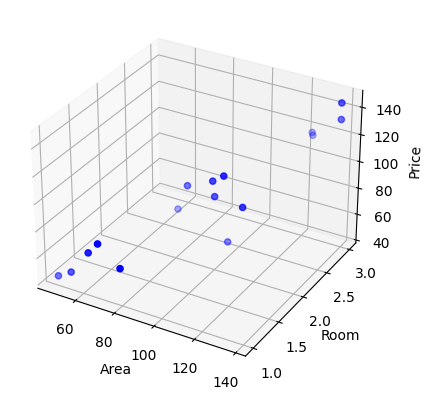

In [9]:
# (3)
from mpl_toolkits.mplot3d import Axes3D
x = area
y = room
z = price
  
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# 在图形中添加坐标轴
fig.add_axes(ax)
# 绘制散点图
ax.scatter(x,y,z, c='b',marker='o')
# Labeling the axes
ax.set_xlabel('Area')
ax.set_ylabel('Room')
ax.set_zlabel('Price')
plt.show()